<a href="https://colab.research.google.com/github/jungry/time_series/blob/main/TimeSeries_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Week 12 - Assignment

## 1. Time Domain

### 1.1 Numerical Data

#### 1.1.1 Dataset Information
**Task:** Print the information about the dataset.

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import Libraries
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
# Download stock data using yfinance from 2020-01-01 to 2023-01-01
apple_data = yf.download("AAPL", start = "2020-01-01", end = "2023-01-01")
# Print dataset info
print(apple_data.info())

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  756 non-null    float64
 1   (Close, AAPL)      756 non-null    float64
 2   (High, AAPL)       756 non-null    float64
 3   (Low, AAPL)        756 non-null    float64
 4   (Open, AAPL)       756 non-null    float64
 5   (Volume, AAPL)     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB
None


#### 1.1.2 Data Visualization
**Task:** Visualize the actual data

<Axes: title={'center': 'AAPL Stock Prices'}, xlabel='Date', ylabel='Close Price'>

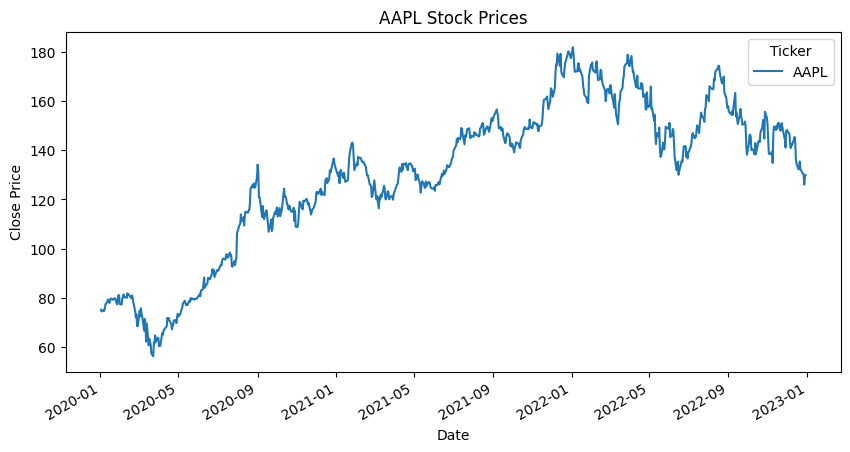

In [4]:
# Plot the 'Close' price over time
apple_data['Date'] = apple_data.index
apple_data['Close'].plot(figsize = (10,5), title = "AAPL Stock Prices", xlabel = "Date", ylabel ="Close Price")

#### 1.1.3 Distinct and Overlapped Rolling Windows
**Task:** Visualize distinct and overlapped rolling windows

Close 컬럼이 없습니다.


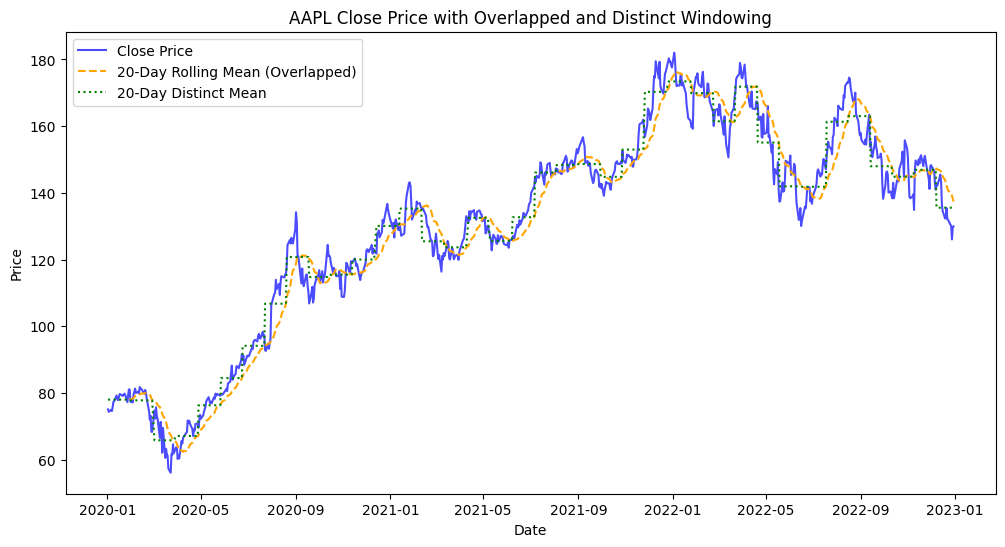

In [5]:
# Ensure 'Close' column exists and drop missing data
#close 컬럼이 존재하는지 확인
if 'Colse' in apple_data.columns:
  #존재한다면 결측치 제거
  apple_data.dropna(subset=['Close'],inplace =['True'])
  print("결측치 제거 완료")
else:
  print("Close 컬럼이 없습니다.")

# Define window size (20)
window_size = 20
# Calculate Overlapped Windowing (Rolling Mean and Standard Deviation)
apple_close_rolling_mean = apple_data['Close'].rolling(window=window_size).mean()
apple_close_rolling_std = apple_data['Close'].rolling(window=window_size).std()
# Calculate Distinct Windowing (Mean and Standard Deviation)
group_ids = (pd.Series(range(len(apple_data['Close'])), index=apple_data['Close'].index) // window_size)
apple_close_distinct_mean = apple_data['Close'].groupby(group_ids).transform("mean")
apple_close_distinct_std = apple_data['Close'].groupby(group_ids).transform("std")
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(apple_data['Close'], label="Close Price", alpha=0.7, color="blue")
plt.plot(apple_close_rolling_mean, label=f"{window_size}-Day Rolling Mean (Overlapped)", linestyle="--", color="orange")
plt.plot(apple_close_distinct_mean, label=f"{window_size}-Day Distinct Mean", linestyle=":", color="green")
plt.title("AAPL Close Price with Overlapped and Distinct Windowing")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


subset = ['Close'] : close 열에서 결측치가 있는 행만 제거한다는 뜻.

### 1.2 Categorical Data

#### 1.2.1 One-Hot Encoding
**Task:** Perform one-hot encoding on a given categorical dataset and print the outcome.

In [6]:
# Import QS University Rankings Dataset from Shared Drives
ranking_data = pd.read_csv('/content/drive/Shareddrives/timeseries-datasets/qs_university.csv')

In [16]:
# Perform One-hot encoding for "Country" Column
one_hot_encoded = pd.get_dummies(ranking_data, columns=['Country'], drop_first=False)
one_hot_columns = [col for col in one_hot_encoded.columns if 'Country_' in col]
one_hot_selected_data = one_hot_encoded[one_hot_columns]

print(one_hot_selected_data)

    Country_Australia  Country_Canada  Country_China  Country_Denmark  \
0               False           False          False            False   
1               False           False          False            False   
2               False           False          False            False   
3               False           False          False            False   
4               False           False          False            False   
..                ...             ...            ...              ...   
65              False            True          False            False   
66              False            True          False            False   
67              False            True          False            False   
68              False            True          False            False   
69              False            True          False            False   

    Country_Finland  Country_Hong Kong  Country_Japan  Country_Netherlands  \
0             False              False       

#### 1.2.2 Dummy Variables
**Task:** Perform dummy variable encoding on the same categorical dataset and print the outcome.

In [15]:
# Perform dummy encoding for the "Country" column
dummy_encoded = pd.get_dummies(ranking_data, columns=['Country'], drop_first=True)
print(dummy_encoded.info())
dummy_encoded_columns = [col for col in dummy_encoded.columns if 'Country_' in col]
dummy_selected_data = dummy_encoded[dummy_encoded_columns]
# Display the result
print(dummy_selected_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   University              70 non-null     object
 1   Country_Canada          70 non-null     bool  
 2   Country_China           70 non-null     bool  
 3   Country_Denmark         70 non-null     bool  
 4   Country_Finland         70 non-null     bool  
 5   Country_Hong Kong       70 non-null     bool  
 6   Country_Japan           70 non-null     bool  
 7   Country_Netherlands     70 non-null     bool  
 8   Country_New Zealand     70 non-null     bool  
 9   Country_Norway          70 non-null     bool  
 10  Country_Singapore       70 non-null     bool  
 11  Country_Switzerland     70 non-null     bool  
 12  Country_United Kingdom  70 non-null     bool  
 13  Country_United States   70 non-null     bool  
dtypes: bool(13), object(1)
memory usage: 1.6+ KB
None
    Countr

### 1.3 Pattern Mining

In [21]:
apple_data.columns = [col[0] if isinstance(col, tuple) else col for col in apple_data.columns]
apple_data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Date'], dtype='object')

In [22]:
# Ensure the "Close" column is used and index is reset

# Find peaks in the Close price

# Calculate support for each pattern (peak)

from scipy.signal import find_peaks

close_data = apple_data['Close']
close_data.info()
peaks, properties = find_peaks(close_data.values, height=150)
peak_support = len(peaks) / len(close_data)

<class 'pandas.core.series.Series'>
DatetimeIndex: 756 entries, 2020-01-02 00:00:00+00:00 to 2022-12-30 00:00:00+00:00
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
756 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB


Peak Count: 54, Support: 0.07


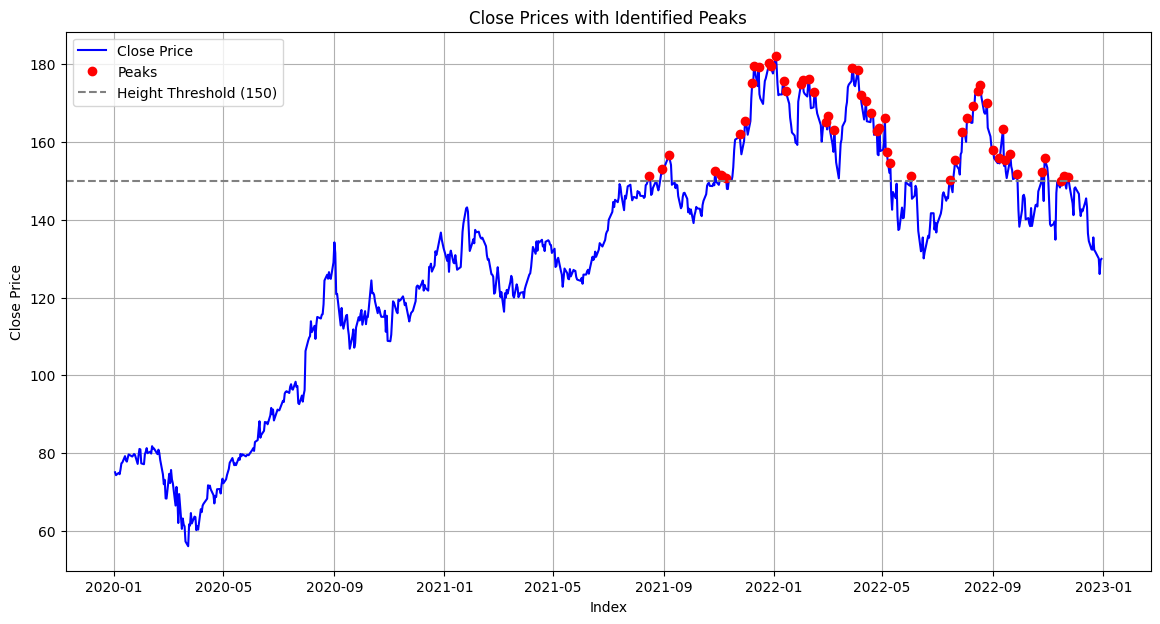

In [25]:
# Plot the Close price data and peaks
# Peak count 계산
peak_count = len(peaks)

# Support 계산: peaks의 개수 / 전체 데이터 개수
support = peak_count / len(close_data)

# Peak Count와 Support 출력
print(f"Peak Count: {peak_count}, Support: {support:.2f}")

plt.figure(figsize=(14,7))
plt.plot(close_data.index, close_data.values, label='Close Price', color='blue')
plt.plot(close_data.index[peaks], close_data.values[peaks], 'ro', label='Peaks')
plt.axhline(y=150, color='gray', linestyle='--', label='Height Threshold (150)')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Close Prices with Identified Peaks')
plt.legend()
plt.grid(True)
plt.show()

## 2. Frequency Domain

### 2.1 Fourier Transform
**Task:** Decompose the time series into its frequency components to reveal possible periodic patterns or trends and visualize the results.

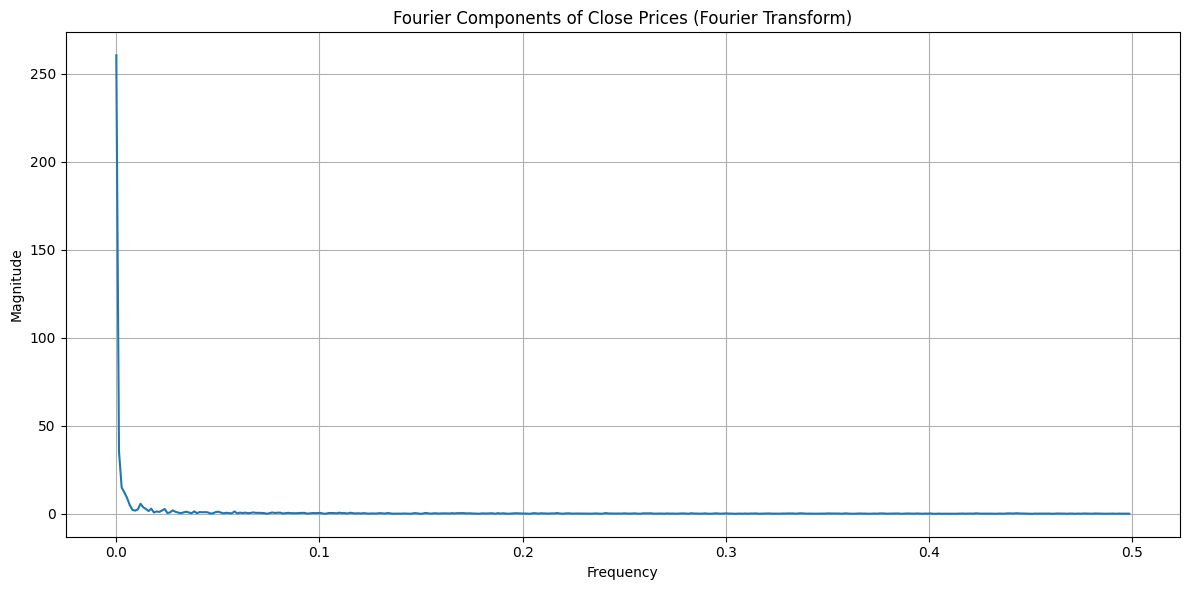

In [27]:
# Extract the "Close" price for AAPL
close_data = apple_data['Close']
close_data = close_data.to_numpy()

# Perform Fourier Transform

# Visualize the frequency components

from scipy.fft import fft, fftfreq

sampling_rate = 1
N = len(close_data)

yf = fft(close_data)
xf = fftfreq(N, d=1/sampling_rate)[:N//2]

plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), label='FFT Magnitude')
plt.title('Fourier Components of Close Prices (Fourier Transform)')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)

plt.tight_layout()
plt.show()


### 2.2 Time Entropy
**Task:** Calculate the entropy of the time series to measure its randomness.

In [32]:
# Extract the "Close" prices and calculate relative frequency distribution

# Calculate entropy

from collections import Counter

def shannon_entropy(data):
  counts = Counter(data)
  probabilities = np.array(list(counts.values())) / len(data)
  entropy = -np.sum(probabilities * np.log2(probabilities))
  return entropy

entropy_value = shannon_entropy(close_data)
print(f'Time Series Entropy: {entropy_value:.4f}')

Time Series Entropy: 9.4819


## 3. Mobility Data Processing

In [33]:
import pandas as pd
import numpy as np
import folium
from sklearn.cluster import KMeans
from scipy.stats import entropy
from IPython.display import HTML, display

# Import the geo_coordinates dataset
geo_data = pd.read_csv('/content/drive/Shareddrives/timeseries-datasets/geo_coordinates.csv')

### 3.1 Data Visualization
**Task:** Preview the GPS coordinates on the Map.

In [35]:
# Calculate the center of the GPS points
longitude_center = 126.9630927
latitude_center = 37.560818

# Create a Folium map with fixed dimensions
map_initial = folium.Map(
    location=[latitude_center, longitude_center],
    zoom_start=16,
    width="1000px",  # Set explicit width
    height="600px"   # Set explicit height
)

# Add GPS points to the map
for _, row in geo_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(map_initial)

# Display the map inline in the notebook
display(HTML(map_initial._repr_html_()))

### 3.2 Clustering GPS Coordinates
**Task:** Perform clustering on GPS coordinates using K-Means or DBSCAN to identify groups of locations.

In [36]:
# Perform clustering (3 clusters)

# Center map on mean latitude and longitude
latitude_center = geo_data['latitude'].mean()
longitude_center = geo_data['longitude'].mean()

# Display clustered GPS data on a map

map_clustered = folium.Map(location=[latitude_center, longitude_center], zoom_start=14)
colors = [0, 'green', 'red', 'blue']  # Add more colors if clusters > 3

for _, row in geo_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1,
        color=colors[int(row['trip_category'])],
        fill=True,
        fill_opacity=0.7
    ).add_to(map_clustered)

# Display the map
display(map_clustered)

### 3.3 Interpolation GPS Coordinates
**Task:** Perform linear interpolation to fill in missing GPS coordinates in the dataset.

In [52]:
# Define the interpolate_path function
def interpolate_path(latitudes, longitudes, num_points=100):
    """Interpolate GPS points between given latitudes and longitudes."""
    latitudes = np.array(latitudes)
    longitudes = np.array(longitudes)
    t = np.linspace(0, 1, len(latitudes))
    interp_t = np.linspace(0, 1, num_points)
    interp_lat = np.interp(interp_t, t, latitudes)
    interp_lon = np.interp(interp_t, t, longitudes)
    return interp_lat, interp_lon

# Filter the data for a specific trip category
trip_category_one = geo_data[geo_data['trip_category'] == 1]

# Extract latitudes and longitudes for interpolation
latitudes = trip_category_one['latitude'].values
longitudes = trip_category_one['longitude'].values

# Interpolate GPS points for a smoother path
interp_lat, interp_lon = interpolate_path(latitudes, longitudes, num_points=200)

# Calculate the center of the GPS points for map centering
longitude_center = np.mean(interp_lon)
latitude_center = np.mean(interp_lat)

# Create a Folium map centered at the calculated center
map_with_path = folium.Map(location=[latitude_center, longitude_center], zoom_start=14)

# Add the interpolated path as a red line
folium.PolyLine(
    locations=list(zip(interp_lat, interp_lon)),  # Combine latitudes and longitudes into pairs
    color="red",  # Set the line color to red
    weight=3,     # Set the line width
    opacity=0.8   # Set the line opacity
).add_to(map_with_path)

# Add markers for original points
for lat, lon in zip(latitudes, longitudes):
    folium.CircleMarker(
        location=[lat, lon],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.7
    ).add_to(map_with_path)

# Display the map
display(HTML(map_with_path._repr_html_()))

## 4. Text Data Processing

### 4.1 Bag of Words
**Task:** Represent text data as the frequency of occurrence of words using the Bag of Words technique and print the results.

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

# Import twitter tweets Dataset
tweets_data = pd.read_csv('/content/drive/Shareddrives/timeseries-datasets/travel_tweets.csv')
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             50 non-null     object
 1   username         50 non-null     object
 2   content          50 non-null     object
 3   number_of_likes  50 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [55]:
# Initialize a CountVectorizer to convert text data into a bag-of-words (BoW) representation
# Fit the vectorizer to the 'content' column and transform it into a sparse matrix
# Get the feature names (words in the vocabulary)
# Convert the sparse matrix to a DataFrame for visualization, with feature names as column headers



vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tweets_data['content'])

# Bag-of-Words 행렬을 배열로 변환
bow_array = X.toarray()

# Bag-of-Words 행렬을 DataFrame으로 변환
feature_names = vectorizer.get_feature_names_out()  # 단어 목록
bow_df = pd.DataFrame(bow_array, columns=feature_names)

# DataFrame 출력
print(bow_df)

    across  amazing  backpacking  beauty  been  begins  believe  can  \
0        0        0            0       0     0       0        0    0   
1        0        0            0       0     0       0        0    0   
2        0        1            0       0     0       0        0    0   
3        0        1            0       0     0       0        0    0   
4        0        0            0       1     0       0        1    1   
5        0        0            0       0     0       0        0    0   
6        1        0            1       0     0       0        0    0   
7        0        0            0       0     0       1        0    0   
8        0        0            0       0     1       0        0    0   
9        0        0            0       0     1       0        0    0   
10       0        0            0       0     1       0        0    0   
11       0        0            0       0     0       0        0    0   
12       1        0            1       0     0       0        0 

### 4.2 Sentence Embeddings
**Task:** Generate sentence-by-sentence embeddings representing the meaning of each sentence in vector space using a pre-trained BERT model.

In [56]:
from sentence_transformers import SentenceTransformer

# Load Sentence Bert Model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create Sentence Embedding
sentence_embeddings = model.encode(tweets_data['content'])

# Print Sentence Embeddings
print(sentence_embeddings)

# Embedding output for each sentence
for i, embedding in enumerate(sentence_embeddings):
    print(f"Sentence {i + 1} Embedding:\n", embedding)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[ 0.07170127  0.06019712  0.04280171 ...  0.01718822 -0.16515246
   0.00051824]
 [-0.0297517  -0.01115785 -0.00914118 ... -0.09982724 -0.21728094
  -0.04734707]
 [ 0.07041002 -0.00104526  0.09900298 ... -0.01354883 -0.0664726
   0.03022696]
 ...
 [ 0.0752414   0.0269714  -0.00052051 ... -0.06139124 -0.02999088
  -0.05599318]
 [ 0.07041002 -0.00104526  0.09900298 ... -0.01354883 -0.0664726
   0.03022696]
 [-0.0297517  -0.01115785 -0.00914118 ... -0.09982724 -0.21728094
  -0.04734707]]
Sentence 1 Embedding:
 [ 7.17012733e-02  6.01971224e-02  4.28017117e-02  2.63443105e-02
  5.98325394e-02  4.42924798e-02  4.43768762e-02 -3.93416472e-02
 -5.34261055e-02 -3.91396731e-02 -1.02023175e-02  4.16354239e-02
  4.93668541e-02  4.64861915e-02 -3.00377849e-02  5.83955273e-02
  1.12056080e-02  7.84072205e-02  2.24535819e-02 -2.83294506e-02
  9.31757130e-03 -7.12067857e-02  3.17108184e-02  4.01496962e-02
  6.03336981e-03  6.73958287e-02  2.46953331e-02  2.24741604e-02
  3.15922685e-02 -7.00325519e-02